In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = "/content/drive/MyDrive/Autodoc Data Analyst Assignment/data_set_da_test.csv"
df = pd.read_csv(data_path)

In [ ]:
df.head(10)

,event_date,session,user,page_type,event_type,product
0,2022-10-08 17:02:41,14274187577460658115s,2006979063809820329u,search_listing_page,page_view,0
1,2022-10-08 17:06:19,14274187577460658115s,2006979063809820329u,search_listing_page,page_view,0
2,2022-10-08 22:19:47,2704204808571844605s,2007646148110679693u,listing_page,page_view,0
3,2022-10-08 22:24:30,8970170322512311099s,11839491588321754710u,search_listing_page,page_view,0
4,2022-10-08 21:22:20,16223970371660715740s,11839887495958431209u,product_page,page_view,0
5,2022-10-08 09:32:33,18071599838924847030s,11840488544463900252u,product_page,page_view,0
6,2022-10-03 13:55:11,14766241913479479142s,2465777020541099786u,listing_page,page_view,0
7,2022-10-11 21:37:30,14295968418153070037s,17910835123677111857u,product_page,page_view,0
8,2022-10-11 19:34:59,12229440244945054666s,17912676908806342770u,product_page,page_view,0
9,2022-10-02 08:37:45,18126509212678608005s,3471971272464343927u,product_page,page_view,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637238 entries, 0 to 637237
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_date  637238 non-null  object
 1   session     637238 non-null  object
 2   user        637238 non-null  object
 3   page_type   637238 non-null  object
 4   event_type  637238 non-null  object
 5   product     637238 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 29.2+ MB


In [ ]:
df.replace('', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637238 entries, 0 to 637237
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_date  637238 non-null  object
 1   session     637238 non-null  object
 2   user        637238 non-null  object
 3   page_type   637238 non-null  object
 4   event_type  637238 non-null  object
 5   product     637238 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 29.2+ MB


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
event_date,637238,464539,2022-10-05 11:57:23,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
session,637238,340443,9543669642136985868s,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user,637238,288088,11769744300065907078u,1266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
page_type,637238,4,product_page,282950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event_type,637238,3,page_view,612498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,637238.0,NaN,NaN,NaN,714635.441979,4536789.963305,0.0,0.0,0.0,0.0,38436515.0


# Distribution Overview

## Event Date Distribution

In [ ]:
df.event_date.value_counts().value_counts()

,count
count,
1,330033
2,103238
3,25438
4,4880
5,825
6,106
7,18
8,1


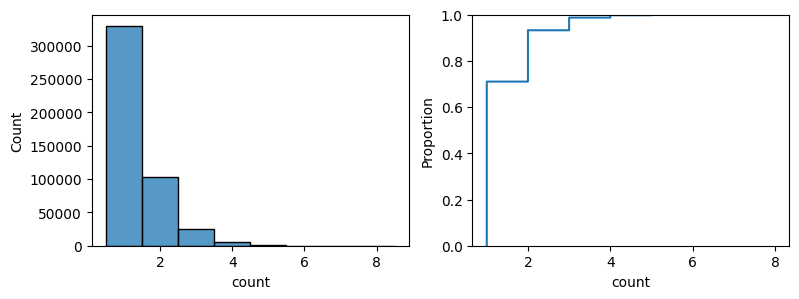

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

sns.histplot(df.event_date.value_counts(), ax=axes[0], discrete=True)
sns.ecdfplot(df.event_date.value_counts(), ax=axes[1])
plt.show() # Display the chart

Min date: 2022-09-30 00:00:00
Max date: 2022-10-13 23:59:54


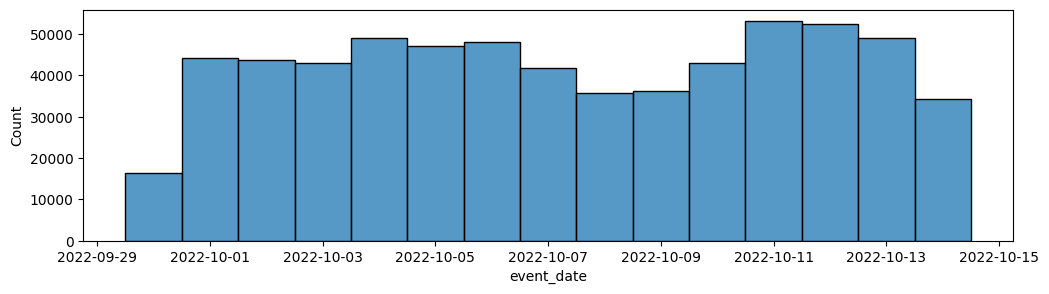

In [ ]:
print('Min date:',df.event_date.min())
print('Max date:', df.event_date.max())

plt.figure(figsize=(12,3))
sns.histplot(pd.to_datetime(df['event_date']), discrete=True)
plt.show()

## Session Distribution

In [ ]:
df.session.value_counts().value_counts().sort_index()

,count
count,
1,250234
2,40742
3,17483
4,9358
5,5943
...,...
193,1
203,1
251,1


In [ ]:
df.session.value_counts().value_counts()[df.session.value_counts().value_counts() > 10].sort_index().tail(20)

,count
count,
25,65
26,66
27,56
28,55
29,49
30,47
31,36
32,37
33,29


In [ ]:
df.session.value_counts().describe(percentiles=[.75, .90, .95, .99, .995]).T

,count
count,340443.000000
mean,1.871791
std,3.692538
min,1.000000
50%,1.000000
75%,2.000000
90%,3.000000
95%,5.000000
99%,14.000000
99.5%,19.000000


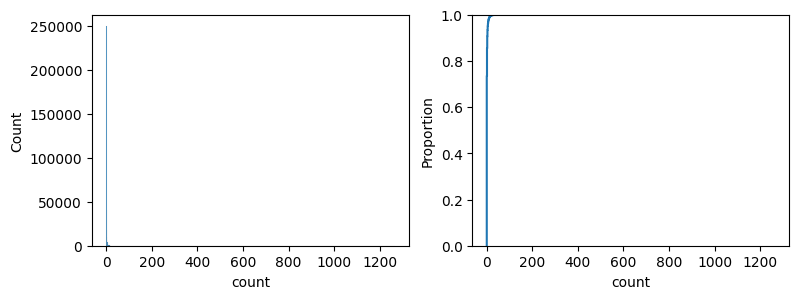

In [ ]:
# Displaying plots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

sns.histplot(df.session.value_counts(), ax=axes[0], discrete=True) # Left plot
sns.ecdfplot(df.session.value_counts(), ax=axes[1]) # Right plot
plt.show() # Display the chart

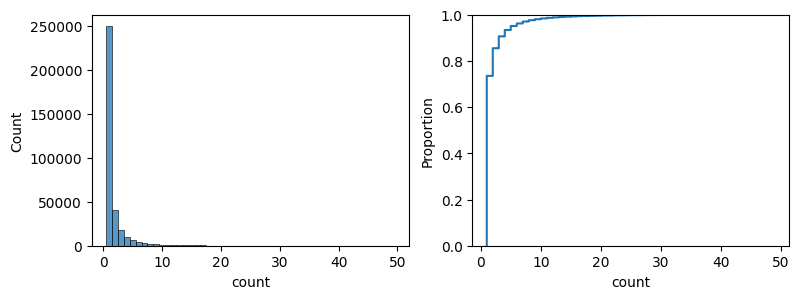

In [ ]:
# Displaying plots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

sns.histplot(df.session.value_counts()[df.session.value_counts() < 50], ax=axes[0], discrete=True) # Left plot
sns.ecdfplot(df.session.value_counts()[df.session.value_counts() < 50], ax=axes[1]) # Right plot
plt.show() # Display the chart

## User Distribution

In [ ]:
df.user.value_counts().value_counts().sort_index()

,count
count,
1,197016
2,38887
3,17435
4,9489
5,6114
...,...
666,1
974,1
977,1


In [ ]:
df.user.value_counts().value_counts()[df.user.value_counts().value_counts() >= 10].sort_index().tail(20)

,count
count,
36,37
37,31
38,23
39,28
40,27
41,21
42,20
43,16
44,22


In [ ]:
df.user.value_counts().describe(percentiles=[.75, .90, .95, .99, .995]).T

,count
count,288088.000000
mean,2.211956
std,6.307799
min,1.000000
50%,1.000000
75%,2.000000
90%,4.000000
95%,7.000000
99%,17.000000
99.5%,24.000000


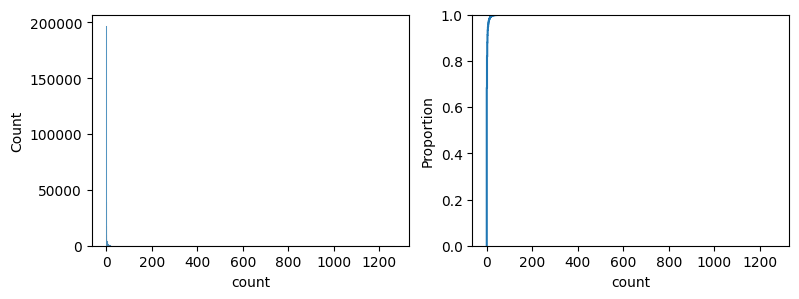

In [ ]:
# Displaying plots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

sns.histplot(df.user.value_counts(), ax=axes[0], discrete=True) # Left plot
sns.ecdfplot(df.user.value_counts(), ax=axes[1]) # Right plot
plt.show() # Display the chart

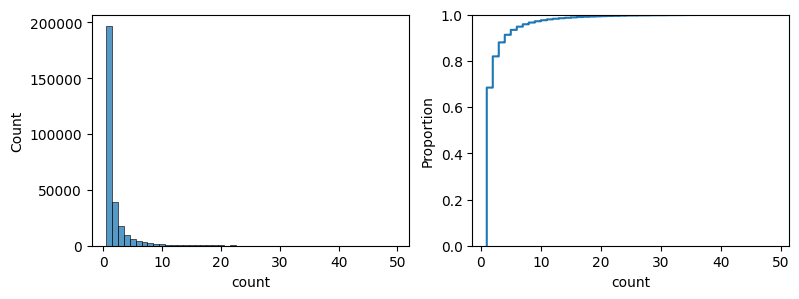

In [ ]:
# Displaying plots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

sns.histplot(df.user.value_counts()[df.user.value_counts() < 50], ax=axes[0], discrete=True) # Left plot
sns.ecdfplot(df.user.value_counts()[df.user.value_counts() < 50], ax=axes[1]) # Right plot
plt.show() # Display the chart

## Page Type Distribution

In [ ]:
df.page_type.value_counts().reset_index()

,page_type,count
0,product_page,282950
1,listing_page,231789
2,search_listing_page,113758
3,order_page,8741


## Event Type Distribution

In [ ]:
df.event_type.value_counts().reset_index()

,event_type,count
0,page_view,612498
1,add_to_cart,15999
2,order,8741


## Product Distribution

In [ ]:
df['product'].value_counts().sort_values(ascending=False)

,count
product,
0,621239
26372760,21
27133309,20
27075197,18
26780006,15
...,...
32086317,1
26629188,1
20371097,1


In [ ]:
df['product'][df['product'] != 0].value_counts().value_counts().sort_index()

,count
count,
1,10248
2,1519
3,393
4,135
5,57
6,34
7,23
8,10
9,6


In [ ]:
total_count = df['product'].value_counts().sum()
count_diff_0 = df['product'][df['product'] != 0].value_counts().sum()

print('Total count:', total_count)
print('Count product != 0:', count_diff_0)
print('Share zeros:', 1 - count_diff_0 / total_count)

Total count: 637238
Count product != 0: 15999
Share zeros: 0.9748932110137813


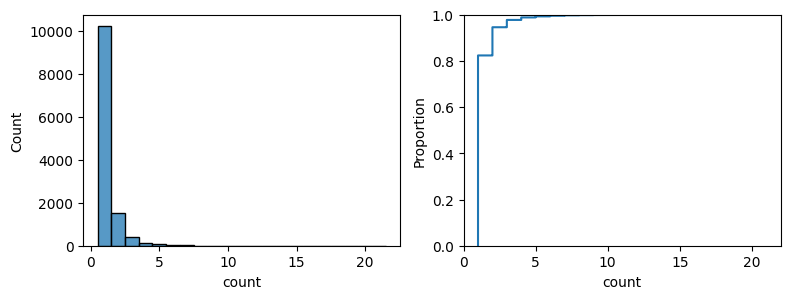

In [ ]:
# Displaying plots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

sns.histplot(df['product'][df['product'] > 0].value_counts(), ax=axes[0], discrete=True) # Left plot
sns.ecdfplot(df['product'][df['product'] > 0].value_counts(), ax=axes[1]) # Right plot
plt.show() # Display the chart

## Bi-Variate Distributions

In [4]:
df['has_product_id'] = df['product'].apply(lambda x: 1 if x != 0 else 0)

In [ ]:
df.groupby('page_type')['event_type'].value_counts().sort_values(ascending=False).reset_index()

,page_type,event_type,count
0,product_page,page_view,270750
1,listing_page,page_view,231263
2,search_listing_page,page_view,110485
3,product_page,add_to_cart,12200
4,order_page,order,8741
5,search_listing_page,add_to_cart,3273
6,listing_page,add_to_cart,526


In [ ]:
df.groupby('has_product_id')['event_type'].value_counts().sort_values(ascending=False).reset_index()

,has_product_id,event_type,count
0,0,page_view,612498
1,1,add_to_cart,15999
2,0,order,8741


In [ ]:
df.groupby('has_product')['page_type'].value_counts().sort_values(ascending=False).reset_index()

,has_product,page_type,count
0,0,product_page,270750
1,0,listing_page,231263
2,0,search_listing_page,110485
3,1,product_page,12200
4,0,order_page,8741
5,1,search_listing_page,3273
6,1,listing_page,526


In [ ]:
session_user_events_count = df.groupby('session')['user'].value_counts()
users_per_session_count = session_user_events_count.reset_index()['session'].value_counts()
users_per_session_count.value_counts()

,count
count,
1,340443


In [ ]:
sessions_per_user_count = session_user_events_count.reset_index()['user'].value_counts()
sessions_per_user_count.value_counts().sort_index().T

,count
count,
1,258298
2,20540
3,5051
4,1820
5,903
6,476
7,275
8,170
9,115


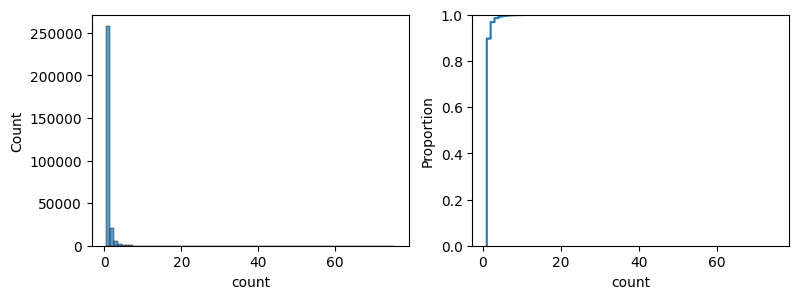

In [ ]:
# Displaying plots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

sns.histplot(sessions_per_user_count, ax=axes[0], discrete=True) # Left plot
sns.ecdfplot(sessions_per_user_count, ax=axes[1]) # Right plot
plt.show() # Display the chart